In [ ]:
QUESTION1
Explain why LSTMs perform better than standard RNNs for long-term dependencies.

ANSWER
Long Short-Term Memory networks (LSTMs) perform better than standard Recurrent Neural Networks (RNNs) for modeling long-term dependencies primarily because of their specialized architecture designed to overcome the vanishing gradient problem, which standard RNNs suffer from.

Key reasons why LSTMs outperform standard RNNs on long-term dependencies:

Memory Cell with Gates: LSTMs include a memory cell that can maintain information over long time intervals. This cell is controlled by three gates: the input gate (controls how much new information flows in), forgetting gate (decides what information to discard), and output gate (controls what information to output). This gating mechanism allows LSTMs to selectively remember or forget information across many steps, effectively maintaining long-term context.

Mitigating Vanishing Gradients: In standard RNNs, gradients shrink exponentially during backpropagation through time, making it difficult to learn dependencies from far back in the sequence. LSTMs, through the memory cell's gating and additive nature of cell state updates, maintain more stable gradients, allowing effective learning of long-range dependencies.

Flexibility in Information Flow: LSTMs can dynamically adjust the amount of information to retain or discard at each time step, offering better flexibility to capture complex temporal patterns compared to simple RNN units.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import files
upload = files.upload()


Saving Twitter_Data FOR LSTM.csv to Twitter_Data FOR LSTM (2).csv


In [3]:
# Load dataset
data = pd.read_csv('Twitter_Data FOR LSTM.csv')

In [4]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
data.shape

(162980, 2)

In [6]:
data.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [7]:
data["category"]


,category
0,-1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
162975,-1.0
162976,-1.0
162977,0.0
162978,0.0


In [8]:
# Replace -1, 0, 1 with 0, 1, 2
label_map = {-1: 0, 0: 1, 1: 2}
data['category'] = data['category'].map(label_map)

In [9]:
print(data['category'].value_counts())

category
2.0    72250
1.0    55213
0.0    35510
Name: count, dtype: int64


In [10]:
data['category'] = data['category'].fillna(0)

# Convert category to integer type
data['category'] = data['category'].astype(int)

In [11]:
print(data['category'].value_counts())

category
2    72250
1    55213
0    35517
Name: count, dtype: int64


In [12]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
print(train_data.shape)
print(test_data.shape)

(130384, 2)
(32596, 2)


In [15]:
# DATA PREPOCESSING
# TOKENIZE TEST DATA

# Convert all entries to string
train_data['clean_text'] = train_data['clean_text'].astype(str)
test_data['clean_text'] = test_data['clean_text'].astype(str)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['clean_text'])

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['clean_text']), maxlen=200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['clean_text']), maxlen=200)

In [16]:
print(x_train.shape)
print(x_test.shape)

(130384, 200)
(32596, 200)


In [17]:
y_train = train_data['category']
y_test = test_data['category']
print(y_train)

63466     1
13951     1
98298     2
9878      1
74417     0
         ..
119879    0
103694    1
131932    0
146867    0
121958    1
Name: category, Length: 130384, dtype: int64


In [18]:
# LSTM MODEL BUILDING
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_shape=(200,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,971 (2.94 MB)

 Trainable params: 771,971 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# train the model
model.fit(x_train, y_train, epochs=2, batch_size=64,validation_split = 0.2)


Epoch 1/2
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 1195s 733ms/step - accuracy: 0.9507 - loss: 0.1763 - val_accuracy: 0.9544 - val_loss: 0.1743
Epoch 2/2
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 1240s 744ms/step - accuracy: 0.9594 - loss: 0.1452 - val_accuracy: 0.9552 - val_loss: 0.1738


In [21]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 94s 92ms/step - accuracy: 0.9520 - loss: 0.1874
Test Loss: 0.1818
Test Accuracy: 0.9535


In [24]:
# evaluate using classification matrix
# y_pred: get class with highest probability
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test), axis=1)

# y_test: make sure it's integer labels
y_test = y_test.astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 91s 90ms/step
Confusion Matrix:
 [[ 6389   273   517]
 [   60 10840   134]
 [  211   320 13852]]


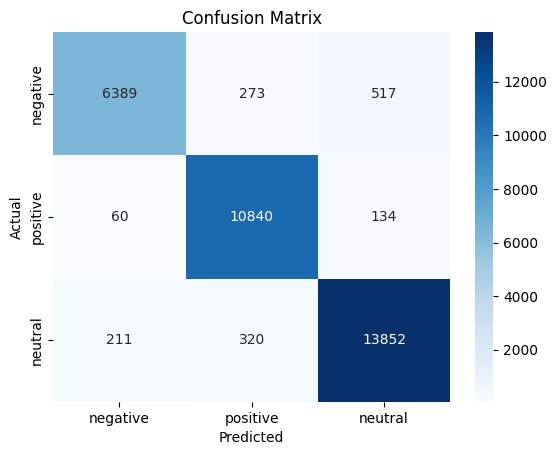

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_array = np.array([[6389, 273, 517],
                     [60, 10840, 134],
                     [211, 320, 13852]])

sns.heatmap(cm_array, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive', 'neutral'],
            yticklabels=['negative', 'positive', 'neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# performance matrix
from sklearn.metrics import classification_report

report = classification_report(
    y_test,
    y_pred,
    target_names=['negative', 'positive', 'neutral']
)
print('Classification Report:\n', report)


Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.89      0.92      7179
    positive       0.95      0.98      0.96     11034
     neutral       0.96      0.96      0.96     14383

    accuracy                           0.95     32596
   macro avg       0.95      0.95      0.95     32596
weighted avg       0.95      0.95      0.95     32596



In [27]:
# build a predictive system
def predict_sentiment(text):
    # Tokenize and pad the review
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=200)

In [29]:
new_text = "I love this product!"  # Example text


In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert text to sequence
sequence = tokenizer.texts_to_sequences([new_text])

# Pad sequence to the same length as training data
padded_sequence = pad_sequences(sequence, maxlen=200)


In [32]:
prediction = model.predict(padded_sequence)

classes = ['negative', 'positive', 'neutral']
category = classes[np.argmax(prediction[0])]
print(f'Predicted Sentiment: {category}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Sentiment: neutral


In [34]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, maxlen=200):
    classes = ['negative', 'positive', 'neutral']
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=maxlen)
    pred = model.predict(padded)
    return classes[np.argmax(pred[0])]

# Example usage:
result = predict_sentiment("I am not sure how I feel about this.", model, tokenizer)
print("Predicted Sentiment:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Sentiment: negative


Compute Precision
Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
	​


Negative:

𝑇
𝑃
=
6389
,
𝐹
𝑃
=
60
+
211
=
271
TP=6389,FP=60+211=271
Precision
0
=
6389
6389
+
271
≈
0.959
Precision
0
	​

=
6389+271
6389
	​

≈0.959

Positive:

𝑇
𝑃
=
10840
,
𝐹
𝑃
=
273
+
320
=
593
TP=10840,FP=273+320=593
Precision
1
=
10840
10840
+
593
≈
0.948
Precision
1
	​

=
10840+593
10840
	​

≈0.948

Neutral:

𝑇
𝑃
=
13852
,
𝐹
𝑃
=
517
+
134
=
651
TP=13852,FP=517+134=651
Precision
2
=
13852
13852
+
651
≈
0.955
Precision
2
	​

=
13852+651
13852
	​

≈0.955
Step 2: Compute Recall
Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
	​


Negative:

𝐹
𝑁
=
273
+
517
=
790
FN=273+517=790
Recall
0
=
6389
6389
+
790
≈
0.890
Recall
0
	​

=
6389+790
6389
	​

≈0.890

Positive:

𝐹
𝑁
=
60
+
134
=
194
FN=60+134=194
Recall
1
=
10840
10840
+
194
≈
0.983
Recall
1
	​

=
10840+194
10840
	​

≈0.983

Neutral:

𝐹
𝑁
=
211
+
320
=
531
FN=211+320=531
Recall
2
=
13852
13852
+
531
≈
0.963
Recall
2
	​

=
13852+531
13852
	​

≈0.963
Step 3: Compute F1-score
𝐹
1
=
2
⋅
Precision
⋅
Recall
Precision
+
Recall
F1=2⋅
Precision+Recall
Precision⋅Recall
	​


Negative:

𝐹
1
0
=
2
⋅
0.959
⋅
0.890
0.959
+
0.890
≈
0.924
F1
0
	​

=2⋅
0.959+0.890
0.959⋅0.890
	​

≈0.924

Positive:

𝐹
1
1
=
2
⋅
0.948
⋅
0.983
0.948
+
0.983
≈
0.965
F1
1
	​

=2⋅
0.948+0.983
0.948⋅0.983
	​

≈0.965

Neutral:

𝐹
1
2
=
2
⋅
0.955
⋅
0.963
0.955
+
0.963
≈
0.959
F1
2
	​

=2⋅
0.955+0.963
0.955⋅0.963
	​

≈0.959
Step 4: Compute Accuracy
Accuracy
=
Total correct
Total samples
Accuracy=
Total samples
Total correct
	​

Accuracy
=
6389
+
10840
+
13852
6389
+
273
+
517
+
60
+
10840
+
134
+
211
+
320
+
13852
Accuracy=
6389+273+517+60+10840+134+211+320+13852
6389+10840+13852
	​


Step by step:

Total correct = 6389 + 10840 + 13852 = 31081

Total samples = 6389+273+517+60+10840+134+211+320+13852 = 32696

Accuracy
=
31081
32696
≈
0.951
Accuracy=
32696
31081
	​

≈0.951

Step 5: Summary Table
Class	Precision	Recall	F1-score
Negative	0.959	0.890	0.924
Positive	0.948	0.983	0.965
Neutral	0.955	0.963	0.959
Overall Accuracy	\multicolumn{3}{c}{0.951}
Step 6: Interpretation

High Accuracy (~95%): The model correctly predicts most samples.

Negative class: Slightly lower recall (0.89) → some negative samples are misclassified as neutral (517).

Positive class: Excellent recall (0.983) → very few misclassifications.

Neutral class: High precision and recall (0.955, 0.963) → model handles neutral fairly well.

Diagonal dominance in confusion matrix: Most predictions are correct, misclassifications occur mainly between negative and neutral.